# 11. 推迟测量原理 & 不可克隆原理

从量子计算的角度来看，量子测量通常被认为是沿着计算基矢的投影测量。电路图中的测量动作可以表示如下：

![Measurement](images/measurement.png)

测量前的单行表示一个量子比特，测量后的双线表示经典比特。

对于一个用量子电路来描述的量子计算过程，中间的测量步骤总可以找到一种等价的方式移到线路的末端，而不影响测量结果的概率分布。如果中间过程中的测量结果被用于该电路的某些阶段，则在推迟测量操作的时候，经典的条件运算可以被条件量子运算代替。

以 Lecture 10 中量子隐形传态的电路为例：

![quantum teleportation](images/quantum_teleportation_circuit.png)

以下电路为应用推迟测量原理后的等价电路：

![deferred measurement](images/deferred_measurement.png)

在原本的电路中，测量前的量子态$|\psi_2\rangle$为

$$
|\psi_2\rangle = \frac{1}{2}(|00\rangle|\psi\rangle +|01\rangle X|\psi\rangle + |10\rangle Z|\psi\rangle + |11\rangle ZX|\psi\rangle)
$$

改为执行受控操作后量子态变为

$$
|\psi^{new}_2\rangle = \frac{1}{2}(|00\rangle|\psi\rangle +|01\rangle |\psi\rangle + |10\rangle |\psi\rangle - |11\rangle |\psi\rangle)
$$

此外，还存在着*隐式测量原理(implicit measurement)*，这意味着不需要测量最后的量子比特。

用 MindQuantum 验证以上等价电路同样可以实现量子隐形传态：

psi = [0.51800187 0.85537948]


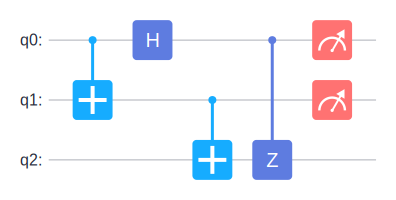

In [1]:
from mindquantum.core.gates import X, H, Z, Measure
from mindquantum.core.circuit import Circuit
from mindquantum.simulator import Simulator
import numpy as np

psi = np.random.rand(2)
psi = psi / np.linalg.norm(psi)
print(f"psi = {psi}")
bell = np.array([1, 0, 0, 1]) / np.sqrt(2)
init = np.kron(bell, psi)

sim = Simulator("mqvector", 3)
sim.set_qs(init)

circ = Circuit()
circ += X.on(1, 0)
circ += H.on(0)
circ.barrier(False)
circ += X.on(2, 1)
circ += Z.on(2, 0)
circ += Measure().on(0)
circ += Measure().on(1)

circ.svg()

In [2]:
sim.apply_circuit(circ)
print(sim.get_qs(ket=True))

0.51800187¦010⟩
0.85537948¦110⟩


可以看到，q0的态$|\psi\rangle$已经成功地传送给q2。

## 关于量子隐形传态的讨论

回想一下，量子隐形传态的量子电路的主要部分实际上是贝尔态创建电路的逆过程，我们可以通过将贝尔态投影到前两个量子比特来得出相同的结果。明确地说，让我们考虑 00 的情况，可以写出

$$
|\psi\rangle|B_{00}\rangle=\frac{1}{\sqrt{2}}(|\psi,0\rangle|0\rangle+|\psi,1\rangle|1\rangle)
$$

其中有$|\psi\rangle\equiv \alpha|0\rangle+\beta|1\rangle$和$|\psi,0\rangle\equiv|\psi\rangle|0\rangle$。

因此，用$|B_{00}\rangle$投影后我们有

$$
\frac{1}{\sqrt{2}}(\langle B_{00}|\psi,0\rangle|0\rangle+\langle B_{00}|\psi,1\rangle|1\rangle)=\frac{1}{2}(\alpha|0\rangle+\beta|1\rangle)=\frac{1}{2}|\psi\rangle
$$

也可以尝试另外几种可能。

# 不可克隆原理

在经典世界中，经典信息可以被复制任意次数。
$$
0 \rightarrow 00000000\dots, 1 \rightarrow 111111\dots
$$
例如我们可以用CNOT实现经典克隆，对于$x\in [0, 1]$，
$$
U_{CNOT}|x\rangle|0\rangle=|x\rangle|x\rangle
$$
关键是不可能对（**未知**）量子态进行这样的（**与状态无关的**）操作，即**完美**克隆$|\psi\rangle \rightarrow |\psi\rangle|\psi\rangle|\psi\rangle|\psi\rangle|\psi\rangle\dots$是被量子力学禁止的。

例如，对于$|\psi\rangle\equiv\alpha|0\rangle+\beta|1\rangle$，
$$
U_{CNOT}|\psi\rangle|0\rangle=\alpha|00\rangle+\beta|11\rangle \neq|\psi\rangle|\psi\rangle
$$

## 证明

以下适用于任何规模的量子系统。

- 假设存在这样的克隆机，即

$$
U_{clone}|\psi\rangle|0\rangle=|\psi\rangle|\psi\rangle
$$

- 它应该适用于任何状态，因此

$$
U_{clone}|\phi\rangle|0\rangle=|\phi\rangle|\phi\rangle
$$

- 当然，我们需要假定这样的操作是幺正的，这意味着

$$
\langle\psi|\phi\rangle=\langle\psi|\langle 0|U^\dagger_{clone}U_{clone}|\phi\rangle|0\rangle=\langle\psi|\phi\rangle^2
$$

这就产生了矛盾。

### 备选证明（基于线性）

- 考虑量子比特$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$

- 假设存在这样的克隆机，即

$$
U_{clone}|\psi\rangle|0\rangle=|\psi\rangle|\psi\rangle
$$

- 还假设它是一个线性运算，即

$$
U_{clone}|\psi\rangle|0\rangle = \alpha U_{clone}|0\rangle|0\rangle+\beta U_{clone}|1\rangle|0\rangle=\alpha |0\rangle|0\rangle+\beta|1\rangle|1\rangle
$$

这再次导致矛盾。

# 通用量子门

经典计算中存在着通用门，比如与非门。现在我们想找到量子计算的通用量子门集，且希望这些通用量子门作用的比特数尽可能少，这可能有许多不同的选择。

作为一个例子，我们会对这样的集合感兴趣：

$$
G= \{ U_{CNOT}, R_z(\theta),R_y(\phi)\}
$$

In [3]:
from show_info import InfoTable

InfoTable('mindquantum', 'numpy')